<a href="https://colab.research.google.com/github/HiteshS37/Python/blob/main/KMeans_Clustering_Centroid__Venn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
# Load, standardize and cluster the wine dataset
wine = load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_data_scaled = StandardScaler().fit_transform(wine_data)
kmeans = KMeans(n_clusters=3, random_state=42).fit(wine_data_scaled)
wine_data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# PCA transformation
pca = PCA(n_components=2)
wine_data_pca = pca.fit_transform(wine_data_scaled)
cluster_centers_pca = pca.transform (kmeans.cluster_centers_)

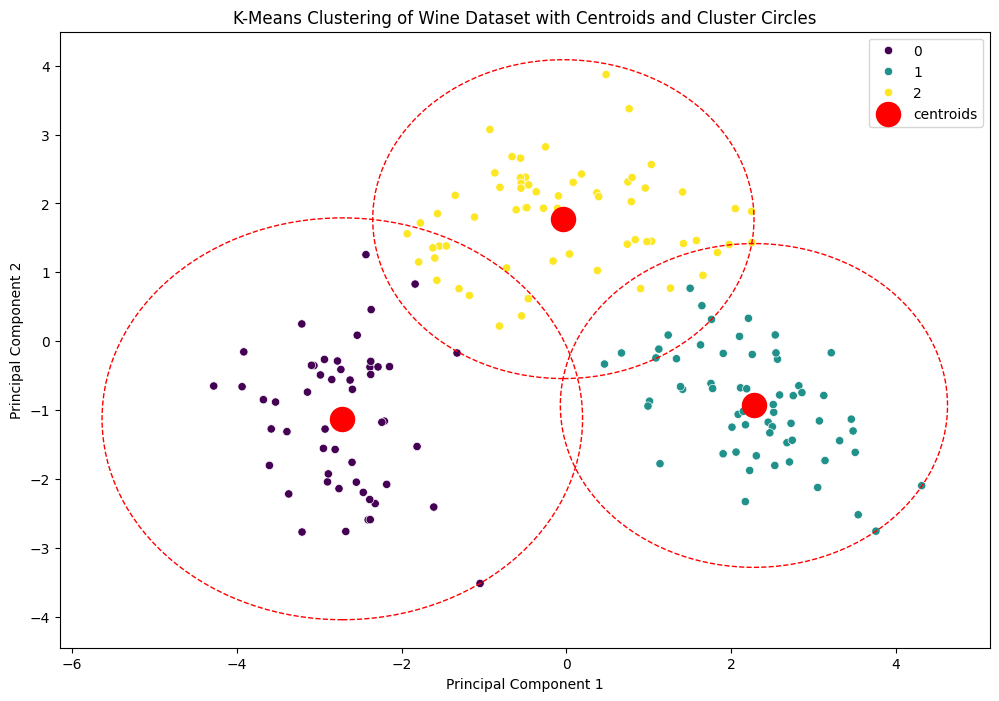

In [ ]:
# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x=wine_data_pca[:,0], y=wine_data_pca[:,1], hue=wine_data['Cluster'], palette='viridis')
plt.scatter(cluster_centers_pca[:,0], cluster_centers_pca[:,1], s=300, c='red', label='centroids')
for i, center in enumerate(cluster_centers_pca):
  radius = np.max(np.linalg.norm(wine_data_pca[wine_data['Cluster'] == i] - center, axis=1))
  plt.gca().add_patch(plt.Circle(center, radius, color='red', fill=False, linestyle='--'))
plt.title("K-Means Clustering of Wine Dataset with Centroids and Cluster Circles")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()